In [13]:
#导入数据
import pandas as pd
import pymysql
import numpy as np

def conn_sql():
    conn = pymysql.connect(
                        host='localhost',
                        port=3306,
                        user='root',
                        passwd='941207',
                        db='yeyw_db',
                        use_unicode=True,
                        charset='utf8',
                        )
    sql_cmd = "SELECT * FROM commission_channel_info_group where sett_month = '201908'"
    data = pd.read_sql(sql_cmd, conn)
    return data
    
data = conn_sql()


In [17]:
#观察数据基本信息
data = data[['object_id', 'sum_money_ratio', 'arpu_ratio', 'star_level', 
             'innet_user', 'keep_card_user', 'dmrn_mark', 'nonefee_user', 'lowfee_user', 'month_off_user','old_user_num',
             'batch_open_num', 'err_time_busi', 'open_acct_num','org_user_numm', 'dkm_busi_ratio',
             'same_money_ratio', 'recount_user', 'recount_fee', 'zd_yw_jc_ratio', 'zd_yw_lc_ratio']]

# print(data.head(5))
# print(data.shape)
print(data.describe())

       sum_money_ratio    arpu_ratio    innet_user  keep_card_user  \
count     10868.000000  10868.000000  10868.000000    10868.000000   
mean          4.249813      0.212042      0.858764        0.005994   
std         139.222109     14.105287      0.140847        0.031432   
min        -169.704100     -1.000000      0.000000        0.000000   
25%          -0.403200     -0.070725      0.824275        0.000000   
50%           0.000000     -0.024300      0.886400        0.000000   
75%           0.082925      0.006800      0.939400        0.002100   
max        8222.222200   1455.800000      1.000000        1.000000   

          dmrn_mark  nonefee_user   lowfee_user  month_off_user  old_user_num  \
count  10868.000000  10868.000000  10868.000000    10868.000000  10868.000000   
mean       0.027761      0.215453      0.016908        0.009577      0.002401   
std        0.049872      0.162962      0.030411        0.018220      0.011099   
min        0.000000      0.000000      0.0000

In [16]:
#是否有空值
# print(data.isnull().any())
# print(data.isna().sum())

#处理缺失值
data.loc[data.org_channel_type == '直销渠道', 'star_level'] = '7'
data.loc[data.star_level == '', 'star_level'] = np.NaN

data['star_level'] = data['star_level'].fillna(method='ffill')

AttributeError: 'DataFrame' object has no attribute 'org_channel_type'

In [5]:
data = data[['object_id', 'eparchy_code', 'city_code', 'sum_money_ratio', 'arpu_ratio', 'org_channel_code','star_level', 
             'innet_user', 'keep_card_user', 'dmrn_mark', 'nonefee_user', 'lowfee_user', 'month_off_user','old_user_num',
             'batch_open_num', 'err_time_busi', 'open_acct_num','org_user_numm', 'dkm_hb', 'dkm_busi_ratio', 'same_money',
             'same_money_ratio', 'recount_flag', 'recount_user', 'recount_fee', 'zd_yw_jc', 'zd_yw_jc_ratio', 'zd_yw_lc', 
             'zd_yw_lc_ratio']]

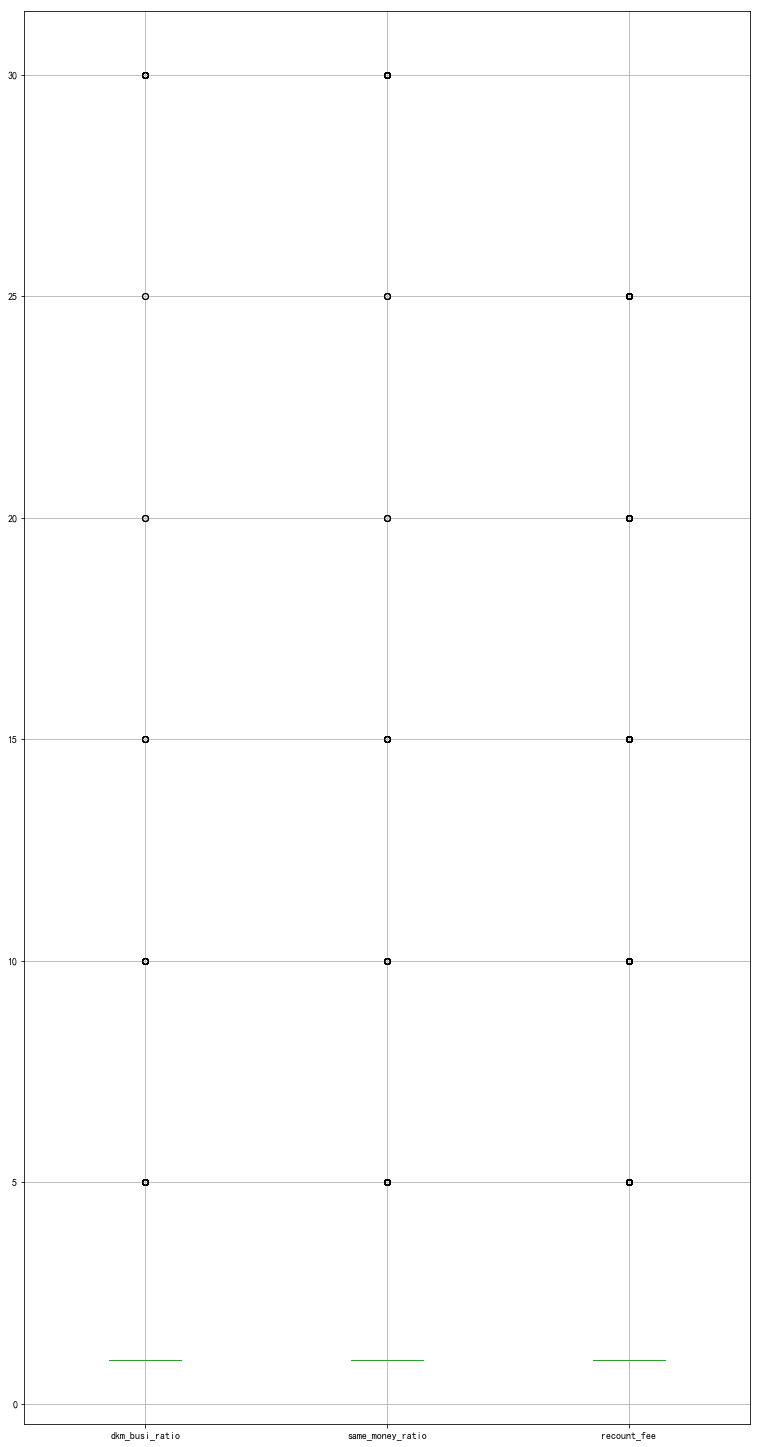

In [21]:
import matplotlib.pyplot as plt #导入图像库

pltData = data[['dkm_busi_ratio', 'same_money_ratio', 'recount_fee']]




plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(1, figsize=(13, 26))#可设定图像大小
#plt.figure() #建立图像
p = pltData.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法.代码到这为止,就已经可以显示带有异常值的箱型图了,但为了标注出异常值的数值,还需要以下代码进行标注.
#for i in range(0,4):
# x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签.[0]是用来标注第1位歌手的异常值数值,同理[i]标注第i+1位歌手的异常值.
# y = p['fliers'][0].get_ydata()
# y.sort() #从小到大排序

# for i in range(len(x)): 
#   if i>0:
#     plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
#   else:
#     plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图


dkm_busi_ratio
same_money_ratio
recount_fee


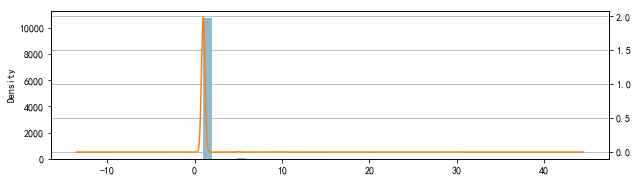

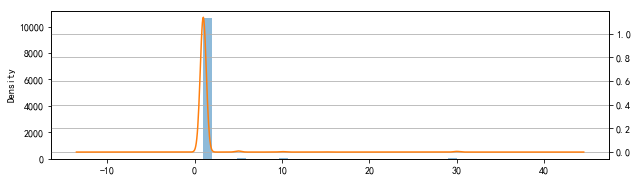

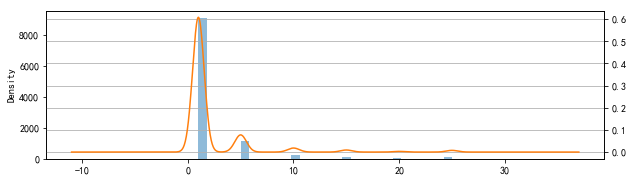

In [22]:
#初步绘制正态分布图
import numpy as np
import matplotlib.pyplot as plt

pltData = data[['dkm_busi_ratio', 'same_money_ratio', 'recount_fee']]



def showPlt(dfIndex):
    s = data[dfIndex]

    fig = plt.figure(figsize = (10,6))
    ax2 = fig.add_subplot(2,1,2)  # 创建子图2
    s.hist(bins=30,alpha = 0.5,ax = ax2)
    s.plot(kind = 'kde', secondary_y=True,ax = ax2)

    plt.grid()
    
    
    
for index, row in pltData.iteritems():
    print(index) 
    showPlt(index)

In [23]:
print("dkm_busi_ratio: %f" % pltData['dkm_busi_ratio'].skew())
pltData["dkm_busi_ratio"] = np.log(pltData[["dkm_busi_ratio"]] + 1e-5) 
print("dkm_busi_ratio: %f" % pltData['dkm_busi_ratio'].skew())

print("same_money_ratio: %f" % pltData['same_money_ratio'].skew())
pltData['same_money_ratio'] = np.log(pltData[["same_money_ratio"]] + 1e-5) 
print("same_money_ratio: %f" % pltData['same_money_ratio'].skew())

print("recount_fee: %f" % pltData['recount_fee'].skew())
pltData['recount_fee'] = np.log(pltData[["recount_fee"]] + 1e-5) 
print("recount_fee: %f" % pltData['recount_fee'].skew())


dkm_busi_ratio: 19.453543
dkm_busi_ratio: 13.650452
same_money_ratio: 11.734205
same_money_ratio: 8.518048
recount_fee: 4.300278
recount_fee: 2.238322


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

dkm_busi_ratio
same_money_ratio
recount_fee


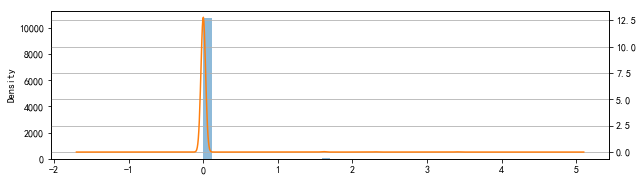

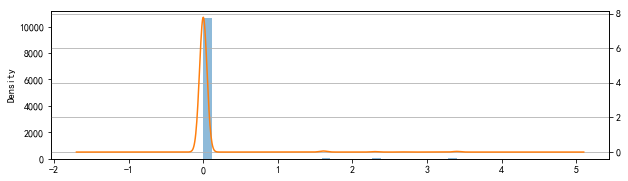

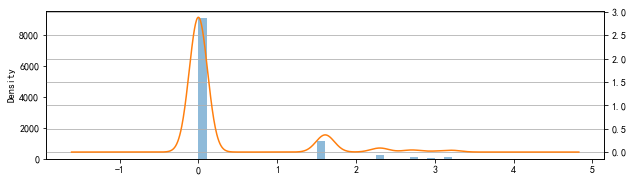

In [24]:



def showPlt(dfIndex):
    s = pltData[dfIndex]

    fig = plt.figure(figsize = (10,6))
    ax2 = fig.add_subplot(2,1,2)  # 创建子图2
    s.hist(bins=30,alpha = 0.5,ax = ax2)
    s.plot(kind = 'kde', secondary_y=True,ax = ax2)

    plt.grid()
    
    
    
for index, row in pltData.iteritems():
    print(index) 
    showPlt(index)

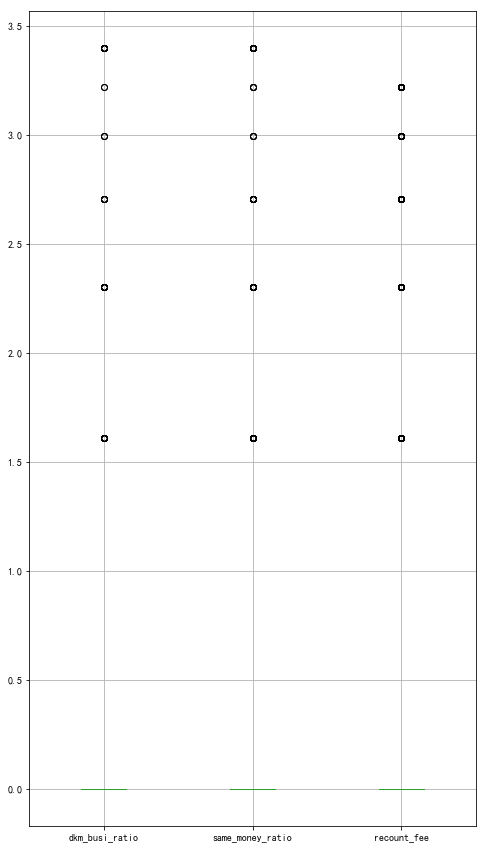

In [25]:



plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(1, figsize=(8, 15))#可设定图像大小
#plt.figure() #建立图像
p = pltData.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法.代码到这为止,就已经可以显示带有异常值的箱型图了,但为了标注出异常值的数值,还需要以下代码进行标注.
#for i in range(0,4):
# x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签.[0]是用来标注第1位歌手的异常值数值,同理[i]标注第i+1位歌手的异常值.
# y = p['fliers'][0].get_ydata()
# y.sort() #从小到大排序

# for i in range(len(x)): 
#   if i>0:
#     plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
#   else:
#     plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图